# Tratamiento de imágenes de satelite con Python

In [1]:
import warnings
warnings.simplefilter("ignore")

from osgeo import gdal
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

In [7]:
b1_ = gdal.Open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B1.TIF")
b1 = b1_.ReadAsArray()

In [25]:
b4_ = gdal.Open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B4.TIF")
b4 = b4_.ReadAsArray()
b3_ = gdal.Open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B3.TIF")
b3 = b3_.ReadAsArray()
b2_ = gdal.Open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B2.TIF")
b2 = b2_.ReadAsArray()

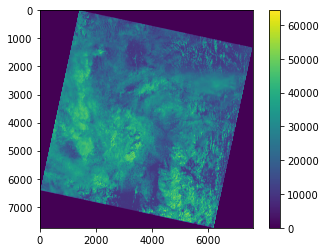

In [10]:
plt.imshow(b1)
plt.colorbar()

In [11]:
b1_nan=np.where(b1==0,np.nan, b1)

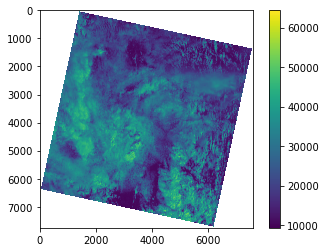

In [12]:
plt.imshow(b1_nan)
plt.colorbar()

In [26]:
rgb = np.stack([b4, b3, b2], axis=-1)

In [27]:
rgb.max()

65535

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


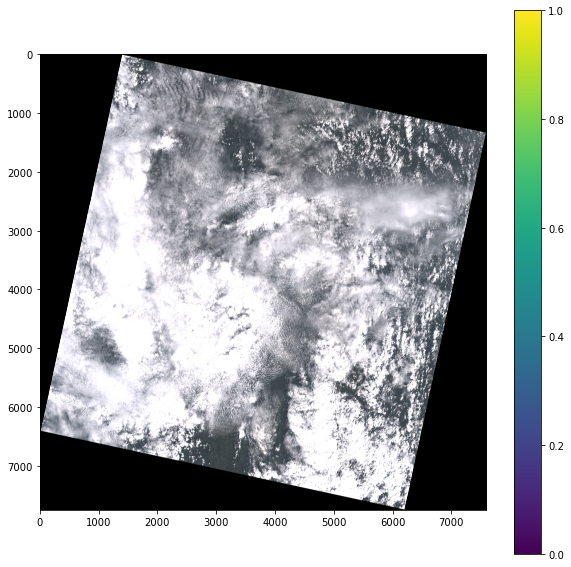

In [28]:
rgb = rgb/rgb.max() * 2.0
plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.colorbar()

In [30]:
b5_ = gdal.Open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B5.TIF")
b5 = b5_.ReadAsArray()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


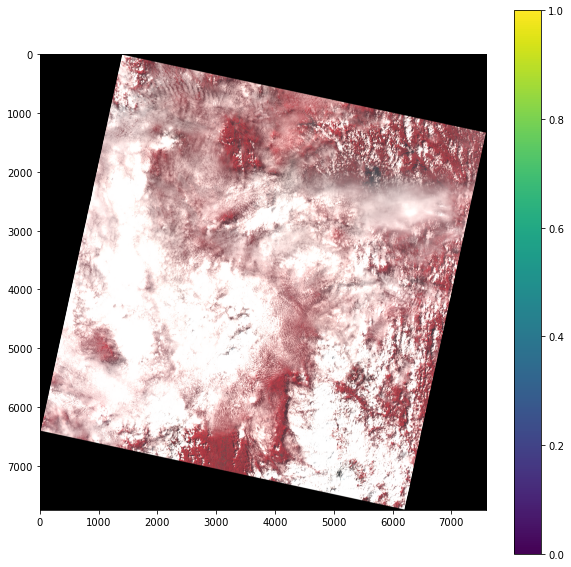

In [31]:
rgb = np.stack([b5, b4, b3], axis=-1)
rgb = rgb/rgb.max() * 2.0
plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.colorbar()

## Indices

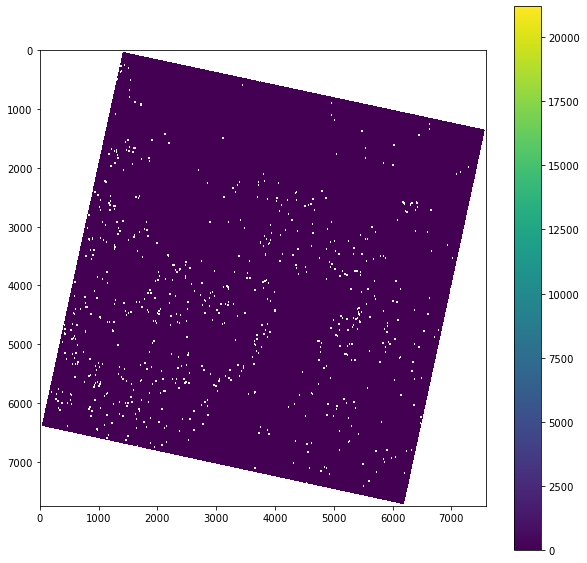

In [32]:
NDVI=(b5-b4)/(b5+b4)
plt.figure(figsize=(10,10))
plt.imshow(NDVI)
plt.colorbar()

## Rasterio

In [ ]:
from rasterio.plot import show, show_hist

In [ ]:
b5=rio.open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B5.TIF")
b4=rio.open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B4.TIF")
b3=rio.open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B3.TIF")
b2=rio.open("https://landsat-pds.s3.amazonaws.com/c1/L8/009/056/LO08_L1TP_009056_20201108_20201120_01_T1/LO08_L1TP_009056_20201108_20201120_01_T1_B2.TIF")

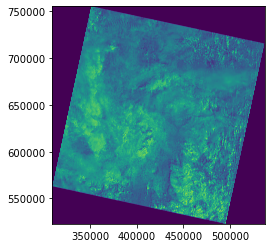

<AxesSubplot:>

In [ ]:
show(b5)

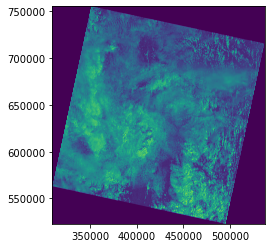

<AxesSubplot:>

In [ ]:
show(b4)

In [ ]:
satdat=rio.open("https://hello.planet.com/data/s/UG2TX98suVmmi9q/download")

In [ ]:
satdat.count

4

In [ ]:
blue,green,red,nir=satdat.read()

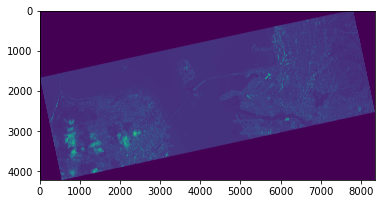

<AxesSubplot:>

In [ ]:
show(blue)

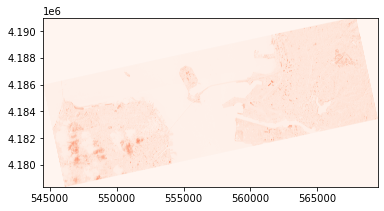

<AxesSubplot:>

In [ ]:
show((satdat,4),cmap="Reds")

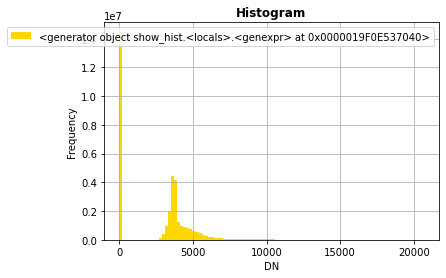

In [ ]:
show_hist(green, bins=100)

## Clasificacion no supervisada

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [33]:
from glob import glob
S_sentinel_bands = glob(r"G:\My Drive\CATEDRA\ANALISISGEOESPACIAL\DATA\sundarbans_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 'G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 'G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 'G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 'G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 'G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 'G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sundarbans_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 'G:\\My Drive\\CATEDRA\\ANALISISGEOESPACIAL\\DATA\\sun

In [42]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [43]:
arr_st = np.stack(l)

In [44]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(954, 298, 12)

In [45]:
x.reshape(-1, 12).shape, 954*298

((284292, 12), 284292)

In [46]:
X_data = x.reshape(-1, 12)

In [47]:
np.shape(X_data)

(284292, 12)

### Escalar

In [48]:
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)
X_scaled.shape

(284292, 12)

### Componentes principales

In [49]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)
data = pca.transform(X_scaled)

In [50]:
data.shape

(284292, 2)

In [51]:
pca.explained_variance_ratio_

array([0.55778198, 0.37521242])

## Kmeans

In [52]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(data)

KMeans(n_clusters=6)

In [53]:
labels = kmeans.predict(data)

In [ ]:
!pip install earthpy

  Using cached earthpy-0.9.2.tar.gz (1.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365097 sha256=44a32de72e61cb187d3a14eb2a09632fc841ccc034e7c38ec9bbc7699dbf6dd3
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\10\94\94\fe10755fcdb46c7b1d1625690fd368d676350f4338b35066c1
Successfully built earthpy


In [54]:
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

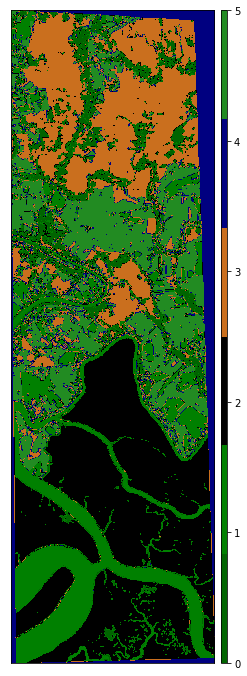

In [55]:
ep.plot_bands(labels.reshape(954, 298), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()